In [84]:
import pandas as pd
import json
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import os

In [96]:
nb_offers = {
    'AWS': 2218,
    'Scaleway': 133,
    'GCP': 3320,
    'Azure': 8412,
    'python': 14147,
    'node.js': 2221,
    'react.js': 1458,
    'vue.js': 1595,
    'java': 12171,
}

In [69]:
def load_data(filename):
    with open(f'./outputs/{filename}', 'r') as f:
        data = json.load(f)
    
    # Collect job offers
    jobs = pd.DataFrame(data['jobs'])
    if "companiesUrls" in data:
        jobs['companyUrl'] = data['companiesUrls']
    else:
        # temp fix
        jobs['companyUrl'] = "https://fr.indeed.com/cmp/" + jobs['company'].str.replace(' ', '-')
    
    # Enrich with companies data (add a collect attribute to all of them to avoid from_dict skipping empty elements)
    companies_json = {k: {'collected': True, **v} for k, v in data['companies'].items()}
    companies = pd.DataFrame.from_dict(companies_json, orient='index')
    df = jobs.join(companies, on='companyUrl', how='left')
    
    df['csp'] = data['csp']
    df['country'] = data['country']
    df['techno'] = data['csp'] in ["python", "java", "node.js", "vue.js", "react.js"]
    return df

In [70]:
pd.DataFrame.from_dict({
    'id1': {},
    'id2': { 'test': True }
}, orient='index')

,test
id2,True


In [71]:
dfs = []
for filename in tqdm(os.listdir('./outputs')):
    df = load_data(filename)
    dfs.append(df)
df = pd.concat(dfs, ignore_index=True)
df

  0%|          | 0/9 [00:00<?, ?it/s]

,title,summary,url,company,location,postDate,salary,isEasyApply,companyUrl,collected,headquarters,revenue,employees,csp,country,techno
0,nouveauLead Dev Node.js / React at startups,Licorne Society est à la recherche de Lead Dev...,https://fr.indeed.com/rc/clk?jk=896b900dfba61f...,Licorne Society,Paris (75),PostedPublié à l'instant,,False,https://fr.indeed.com/cmp/Licorne-Society-2,True,NaN,NaN,NaN,node.js,fr,True
1,nouveauCTO - Startup dans l'environnement,Licorne Society a été missionné par une startu...,https://fr.indeed.com/rc/clk?jk=79ea4c24e70cf6...,Licorne Society,Télétravail in Paris (75),PostedPublié à l'instant,,False,https://fr.indeed.com/cmp/Licorne-Society-2,True,NaN,NaN,NaN,node.js,fr,True
2,nouveauLead développeur H/F,ENTREPRISE EXPERT RH NOS OFFRES D'EMPLOI MON C...,https://fr.indeed.com/rc/clk?jk=f4f2d3bf1725c0...,Leihia,Sorèze (81)+ 4 lieux,PostedPublié à l'instant,À partir de 40 000 € par an,False,https://fr.indeed.com/cmp/Leihia,True,NaN,NaN,NaN,node.js,fr,True
3,nouveauDéveloppeur Front-End React.JS,Dans le cadre d'un projet de développement fro...,https://fr.indeed.com/rc/clk?jk=20b6e5a242b7c0...,Avisto,31100 Toulouse+ 1 lieu,PostedAujourd'hui,,False,https://fr.indeed.com/cmp/Avisto,True,Vallauris,20 à 85 M (EUR),201 à 500,node.js,fr,True
4,nouveauDéveloppeur React-Node Js-(H/F),Vos missions au quotidien Vous aimez interveni...,https://fr.indeed.com/rc/clk?jk=3e779d31d1fc09...,Société Générale,Télétravail in La Défense (92),PostedAujourd'hui,,False,https://fr.indeed.com/cmp/Soci%C3%A9t%C3%A9-G%...,True,"29, boulevard Haussmann\r\n75009 Paris",plus de 8 Mrd (EUR),> 10 000,node.js,fr,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3602,nouveauBusiness Analyst Intern,Join a fast-growing company for an internship ...,https://fr.indeed.com/rc/clk?jk=554aaee52c3185...,Stonly,Télétravail in Paris (75),PostedAujourd'hui,Temps plein +1,False,https://fr.indeed.com/cmp/Stonly,True,NaN,NaN,NaN,python,fr,True
3603,nouveauIngénieur de Production AWS H/F,Rattaché(e) directement au Responsable Opérati...,https://fr.indeed.com/rc/clk?jk=31cb49fbfd87ab...,Consort NT,Montrouge (92),PostedAujourd'hui,,False,https://fr.indeed.com/cmp/Consort-Nt,True,Paris,85 à 450 M (EUR),1 001 à 5 000,python,fr,True
3604,nouveauData Engineer (f/m/d),Wefox is revolutionising insurance by empoweri...,https://fr.indeed.com/rc/clk?jk=612718194347d5...,wefox,Télétravail in Paris (75),PostedAujourd'hui,,False,https://fr.indeed.com/cmp/Wefox,True,"Urbanstr. 71, 10967 Berlin",NaN,501 à 1 000,python,fr,True
3605,nouveauDocteur/Ingénieur en Intelligence Artif...,"Environnements AI et Big Data, connaissances l...",https://fr.indeed.com/rc/clk?jk=c4c760241e9bf5...,Thales,92360 Meudon,PostedAujourd'hui,Temps plein,False,https://fr.indeed.com/cmp/Thales,True,La Défense,plus de 8 Mrd (EUR),> 10 000,python,fr,True


In [75]:
# Filter offer to own
is_own = df.company.isin(["AWS EMEA SARL (France Branch)", "Scaleway"])
df = df[~is_own]

# Keep only tech
df = df[df.techno]

In [76]:
df_by_csp = df.groupby('csp')['employees'].value_counts().unstack(0)
df_by_csp

csp,java,node.js,python,react.js,vue.js
employees,,,,,
1 001 à 5 000,NaN,NaN,3.0,6.0,2.0
11 à 50,1.0,35.0,1.0,29.0,24.0
2 à 10,4.0,5.0,3.0,5.0,7.0
201 à 500,28.0,9.0,33.0,4.0,3.0
501 à 1 000,1.0,1.0,12.0,1.0,1.0
51 à 200,2.0,3.0,4.0,7.0,8.0
> 10 000,27.0,2.0,15.0,6.0,5.0


In [85]:
# Ref.: https://stackoverflow.com/a/22636132/10115198
def empToInt(emp):
    if type(emp) == str:
        return int(emp.split(' à ')[0].replace(' ', '').replace('>', ''))
    return None
key = df_by_csp.index.map(empToInt)
df_by_csp = df_by_csp.iloc[key.argsort()]

In [101]:
# Normalise using offer counts
df_by_csp = df_by_csp / df_by_csp.sum() * (list(map(lambda e: nb_offers[e], df_by_csp.columns)))
df_by_csp

csp,java,node.js,python,react.js,vue.js
employees,,,,,
2 à 10,772.761905,201.909091,597.760563,125.689655,223.3
11 à 50,193.190476,1413.363636,199.253521,729.000000,765.6
51 à 200,386.380952,121.145455,797.014085,175.965517,255.2
201 à 500,5409.333333,363.436364,6575.366197,100.551724,95.7
501 à 1 000,193.190476,40.381818,2391.042254,25.137931,31.9
1 001 à 5 000,NaN,NaN,597.760563,150.827586,63.8
> 10 000,5216.142857,80.763636,2988.802817,150.827586,159.5


In [102]:
# Absolute market shares
# -> which SHARE of each markets are companies owning?
# (mainly big companies are gonna appear as they own the market)

Text(0.5, 0, 'Employees counts')

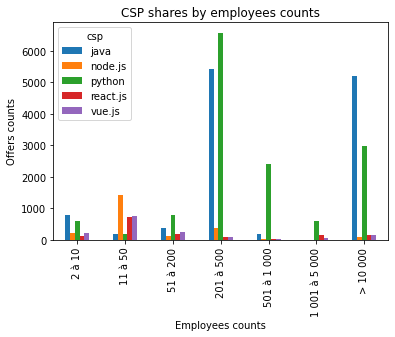

In [103]:
df_by_csp.plot(kind='bar')
plt.title('CSP shares by employees counts')
plt.ylabel('Offers counts')
plt.xlabel('Employees counts')

In [104]:
# Building relative version of the plot for easier comparison
# -> where is each company FOCUSING / which companies are its targets?
# (even small companies should appear here as they have a target strategy)

Text(0.5, 0, 'Employees counts')

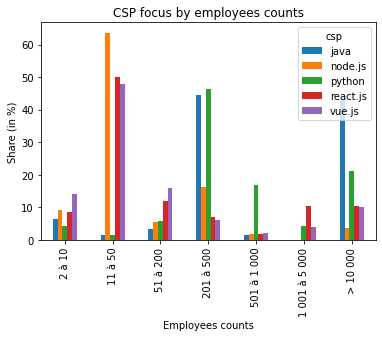

In [106]:
df_by_csp_relative = 100 * df_by_csp / df_by_csp.sum()
df_by_csp_relative.plot(kind='bar')
plt.title('CSP focus by employees counts')
plt.ylabel('Share (in %)')
plt.xlabel('Employees counts')

In [109]:
# Nombre d'offres par entreprises
df.groupby('csp').count()['title']

csp
java        100
node.js     100
python      100
react.js    100
vue.js      100
Name: title, dtype: int64

In [110]:
# Nombre d'offres avec infos sur entreprises
df.groupby('csp').count()['employees']

csp
java        63
node.js     55
python      71
react.js    58
vue.js      50
Name: employees, dtype: int64

In [112]:
df_by_csp.sum()

csp
java        12171.0
node.js      2221.0
python      14147.0
react.js     1458.0
vue.js       1595.0
dtype: float64